In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
alpha_key = 'Y8YQFOIVHPA381U4'
function = 'TIME_SERIES_DAILY'
symbol = 'XLV'


## Load XLV API 
#### Create percent change column

In [3]:
url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&outputsize=full&apikey={alpha_key}"

In [4]:
response = requests.get(url)
xlv_file = response.json()

In [5]:
xlv_values = xlv_file['Time Series (Daily)']

In [6]:
for value in xlv_values:
    open_prices = []

In [7]:
df = pd.DataFrame(xlv_values)
xlv_df = df.T
column_head = ['open', 'high', 'low', 'close', 'volume']
xlv_df.columns = column_head
xlv_df.reset_index(inplace = True)

In [8]:
xlv_df['open'] = xlv_df.open.astype(float)
xlv_df['high'] = xlv_df.high.astype(float)
xlv_df['low'] = xlv_df.low.astype(float)
xlv_df['close'] = xlv_df.close.astype(float)
xlv_df['volume'] = xlv_df.volume.astype(float)

In [9]:
xlv_df['day_pct_change'] = (xlv_df['close']-xlv_df['open'])/xlv_df['open']*100

In [10]:
for entry in xlv_df:
    pct_change = (xlv_df['close'] - xlv_df['open'].iloc[-1])/xlv_df['open'].iloc[-1]
    xlv_df['overall_pct_change'] = pct_change * 100

In [11]:
xlv_df.head()

,index,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-11,100.01,100.27,99.880,99.99,658539.0,-0.019998,235.199464
1,2019-12-10,99.69,100.02,99.295,99.93,6024565.0,0.240746,234.998324
2,2019-12-09,100.45,100.47,99.710,99.71,5148857.0,-0.736685,234.260811
3,2019-12-06,100.27,100.75,100.200,100.41,5658514.0,0.139623,236.607442
4,2019-12-05,99.81,99.90,98.910,99.75,7390352.0,-0.060114,234.394904


## Load S&P API


In [12]:
sp_symbol = '.INX'

url_sp = f"https://www.alphavantage.co/query?function={function}&symbol={sp_symbol}&outputsize=full&apikey={alpha_key}"

In [13]:
response2 = requests.get(url_sp)
sp_file = response2.json()

In [14]:
sp_values = sp_file['Time Series (Daily)']
sp_df = pd.DataFrame(sp_values)
sp_df = sp_df.T
sp_df.columns = column_head
sp_df['open'] = sp_df.open.astype(float)
sp_df['high'] = sp_df.high.astype(float)
sp_df['low'] = sp_df.low.astype(float)
sp_df['close'] = sp_df.close.astype(float)
sp_df['volume'] = sp_df.volume.astype(float)

In [15]:
sp_df['day_pct_change'] = (sp_df['close']-sp_df['open'])/sp_df['open']*100

In [16]:
for entry in sp_df:
    pct_change = (sp_df['close'] - sp_df['open'].iloc[-1])/sp_df['open'].iloc[-1]
    sp_df['overall_pct_change'] = pct_change * 100

In [17]:
xlv_df.describe()

,open,high,low,close,volume,day_pct_change,overall_pct_change
count,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03,5034.000000,5034.000000
mean,45.306005,45.571740,45.007637,45.305046,5.178174e+06,-0.002983,51.877458
std,21.750188,21.847649,21.644113,21.755622,5.490360e+06,0.997414,72.932020
min,21.750000,22.100000,21.000000,21.880000,9.000000e+02,-8.646889,-26.651022
25%,29.550000,29.730000,29.350000,29.550000,4.510750e+05,-0.484426,-0.938652
50%,32.905000,33.080000,32.680550,32.915000,4.409894e+06,0.021669,10.341938
75%,66.825000,67.357500,65.975000,66.855000,7.780256e+06,0.506674,124.120013
max,100.450000,100.750000,100.200000,100.410000,6.647018e+07,8.372274,236.607442


In [18]:
sp_df.describe()

,open,high,low,close,volume,day_pct_change,overall_pct_change
count,5018.000000,5018.000000,5018.000000,5018.000000,5.018000e+03,5018.000000,5018.000000
mean,1570.597865,1579.478507,1560.968013,1570.775398,3.090208e+09,0.016949,6.910015
std,580.669073,581.404970,579.761616,580.752697,1.474999e+09,1.138758,39.527153
min,679.280000,695.270000,666.790000,676.530000,3.507579e+08,-8.723105,-53.954058
25%,1151.155050,1159.525000,1141.940000,1151.037525,1.667910e+09,-0.447677,-21.658157
50%,1360.020000,1368.275000,1348.660000,1360.150000,3.218100e+09,0.051834,-7.425557
75%,1979.960000,1988.222450,1971.715000,1981.592475,3.917825e+09,0.520102,34.871021
max,3147.179900,3154.260000,3143.409900,3153.629900,1.145623e+10,10.789002,114.642158


## Hypothesis 1 Testing: Average Returns

#### H0: The daily avg percent change in the XLV index fund is <= to that of the overall S&P 500 
#### HA: The daily avg percent change in the XLV index fund is greater than the S&P 500 

In [19]:
xlv_avg_percent_moves = []
sp_avg_percent_moves = []

for i in range(5000):
    
    sample_xlv = xlv_df.sample(n = 50, random_state = i)
    xlv_avg_percent_moves.append(sample_xlv.day_pct_change.mean())
    
    sample_sp = sp_df.sample(n = 50, random_state = i)
    sp_avg_percent_moves.append(sample_sp.day_pct_change.mean())


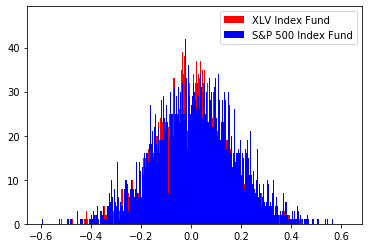

In [20]:
plt.hist(xlv_avg_percent_moves, bins = 500, color = 'red', label = 'XLV Index Fund');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500 Index Fund');
plt.legend();

In [21]:
#Z-test stat for S&P benchmark group
import statistics
x_hat = sum(xlv_avg_percent_moves)/len(xlv_avg_percent_moves)
mu = sum(sp_avg_percent_moves)/len(xlv_avg_percent_moves)
sigma = statistics.stdev(sp_avg_percent_moves)
n = 5017

In [22]:
z_stat = (x_hat - mu)/sigma/math.sqrt(n)
print(f"Z-statistic: {z_stat}")

p_val = stats.norm.cdf(z_stat)
print(f"P-Value: {p_val}")

Z-statistic: -0.0018107023888433763
P-Value: 0.49927763465459624


In [23]:
#take a t test to see if there is a statistical significance in difference of means
S = statistics.stdev(xlv_avg_percent_moves)
t_stat = (x_hat - mu)/S/math.sqrt(n)
print(f"T-test stat: {t_stat}")

T-test stat: -0.0021194002133081767


*Due to the Z-stat and T-stat we fail to reject H0*

In [24]:
#z_score * SE = real difference in sample and population means
std_error = sigma/math.sqrt(n)
print(f"Standard_error: {std_error}")
real_diff = std_error * z_stat
real_diff

Standard_error: 0.002277601156903066


-4.124057855636819e-06

## Johnson & Johnson Performance